# Análise da Atividade Um Robô Aspirador

Professor(a), com o uso das técnicas de LA, pudemos responder as seguintes questões sobre essa etapa:
1. O que a média das notas, desvio padrão, percentis, média de engajamento pode nos dizer sobre a atividade Um Robô Aspirador? 
2. Qual a relação entre as notas da atividade e a experiência prévia em programação? 
3. Qual a relação entre as notas da atividade e o engajamento no curso? 
4. Como podemos identificar o grupo de alunos que estão com dificuldades nos processos de ensino e de aprendizagem?

Para respondermos essas questões sobre a atividade Um Robô Aspirador, combinamos as informações do perfil do aluno com a planilha de avaliação da atividade Um Robô Aspirador, inserindo as informações de cada aluno. Assim, para agilizar o processo de análise foi importante padronizar os nomes das colunas, bem como o conteúdo das células.


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.cluster import KMeans

# Carregar os arquivos CSV em DataFrames
df_atividade_01 = pd.read_csv('atividade_01.csv')
df_engajamento = pd.read_csv('engajamento.csv')

# Combinação dos DataFrames
#df_combinado = pd.concat([df_atividade_01, df_engajamento])
df_combinado = pd.merge(df_atividade_01, df_engajamento, on='ID', how='inner')

# Excluir uma coluna
df_combinado.drop(columns=['USERID_y'], inplace=True)
df_combinado.drop(columns=['TOTAL_ATIVIDADE_01_x'], inplace=True) 

df_combinado.rename(columns={'USERID_x': 'USERID'}, inplace=True)
df_combinado.rename(columns={'TOTAL_ATIVIDADE_01_y': 'TOTAL_ATIVIDADE_01'}, inplace=True)

# Salvar o DataFrame combinado em um novo arquivo CSV
df_combinado.to_csv('atividade01comengajamento.csv', index=False)

In [2]:
df_combinado

,ID,USERID,EXPERIENCIA,ALG_01,BASE_ALG_01,DEC_01,BASE_DEC_01,REC_01,BASE_REC_01,ABS_01,BASE_ABS_01,TOTAL_CP,TOTAL_ATIVIDADE_01,QUESTIONARIO_01,ENGAJAMENTO_01,TOTAL_ATIVIDADE_02,QUESTIONARIO_02,ENGAJAMENTO_02,TOTAL_ATIVIDADE_03,ENGAJAMENTO_03
0,aluno 01,63,2,S,2.5,S,2.50,S,2.50,S,2.50,0.000,10.00,100.0,67,9,NaN,80,0,66.0
1,aluno 02,56,2,S,2.5,S,2.50,S,2.50,S,2.50,7.275,10.00,100.0,100,9,100.0,100,10,100.0
2,aluno 03,41,1,S,2.5,S,2.50,S,2.50,S,2.50,5.410,10.00,100.0,100,10,100.0,100,10,100.0
3,aluno 04,25,2,S,2.5,P,1.25,P,1.25,N,0.00,3.125,5.00,0.0,67,10,NaN,80,9,83.5
4,aluno 05,26,3,S,2.5,S,2.50,S,2.50,N,0.00,7.695,7.50,0.0,67,9,NaN,80,10,83.5
5,aluno 06,20,3,S,2.5,P,1.25,P,1.25,N,0.00,3.330,5.00,100.0,100,9,100.0,100,0,50.0
6,aluno 07,43,2,S,2.5,S,2.50,S,2.50,N,0.00,3.330,7.50,0.0,67,9,NaN,80,9,83.5
7,aluno 08,65,3,NaN,0.0,NaN,0.00,NaN,0.00,NaN,0.00,0.000,0.00,0.0,0,0,NaN,0,0,0.0
8,aluno 09,40,2,S,2.5,S,2.50,S,2.50,S,2.50,0.830,10.00,0.0,67,0,100.0,80,0,40.0
9,aluno 10,50,2,S,2.5,P,1.25,P,1.25,N,0.00,6.240,5.00,100.0,100,7,100.0,100,4,100.0


## PAINEL DE INDICADORES

Professor(a) no nosso exemplo, o código abaixo, fornece informações sobre a turma, Por Exemplo:

* media_notas: Esta métrica representa a média das notas da turma na atividade.
*   desvio_notas: O desvio padrão das notas mede a dispersão das notas em relação à média. Um desvio padrão alto indica uma grande variação nas notas, o que pode sugerir que os resultados estão amplamente espalhados.
*   percentil_25, percentil_50, percentil_75: Esses percentis dividem as notas em quartis. O percentil 25 representa o primeiro quartil, o percentil 50 representa a mediana (segundo quartil) e o percentil 75 representa o terceiro quartil. Isso ajuda a entender a distribuição das notas e a identificar alunos que estão acima ou abaixo da média.
*   media_engajamento: Esta métrica representa a média do engajamento dos alunos na atividade. Pode indicar o nível médio de envolvimento dos alunos na atividade.
*   alerta_notas: O número de alunos com notas abaixo ou iguais a 5. Isso pode indicar o número de alunos que estão tendo dificuldades na atividade.
*   alerta_engajamento: O número de alunos com um nível de engajamento abaixo de 50. Isso pode indicar o número de alunos que não estão totalmente envolvidos na atividade.

In [3]:
data = {
    'Aluno': df_combinado['ID'],
    'ALGORITMO': df_combinado['BASE_ALG_01'],
    'DECOMPOSIÇÃO': df_combinado['BASE_DEC_01'],
    'RECONHECIMENTO DE PADRÕES': df_combinado['BASE_REC_01'],
    'ABSTRAÇÃO': df_combinado['BASE_ABS_01'],
    'Total': df_combinado['TOTAL_ATIVIDADE_01'],
}

df_notas = pd.DataFrame(data)

data_exp = {
   'Aluno': df_combinado['ID'],
    'NotaCP': df_combinado['TOTAL_CP'],
    'Nota01': df_combinado['TOTAL_ATIVIDADE_01'],
    'Experiencia': df_combinado['EXPERIENCIA'],
}

df_exp = pd.DataFrame(data_exp)

data_eng = {
   'Aluno': df_combinado['ID'],
    'NotaCP': df_combinado['TOTAL_CP'],
    'Nota01': df_combinado['TOTAL_ATIVIDADE_01'],
    'Engajamento': df_combinado['ENGAJAMENTO_01'],
}

df_eng = pd.DataFrame(data_eng)

df_exp['Experiencia'].fillna(0, inplace=True)
df_eng['NotaCP'].fillna(0, inplace=True)
df_eng['Nota01'].fillna(0, inplace=True)
df_eng['Engajamento'].fillna(0, inplace=True)

# Configurar o layout do painel
layout_painel = go.Layout(
    grid={'rows': 4, 'columns': 2},
    title='Painel de Indicadores e Alertas',
    template='plotly_white',
    margin=dict(l=70, r=50, t=80, b=80)  # Margens do painel
)

media_notas = df_combinado['TOTAL_ATIVIDADE_01'].mean()
desvio_notas = df_combinado['TOTAL_ATIVIDADE_01'].std()
percentil_25 = np.percentile(df_combinado['TOTAL_ATIVIDADE_01'], 25)
percentil_50 = np.percentile(df_combinado['TOTAL_ATIVIDADE_01'], 50)
percentil_75 = np.percentile(df_combinado['TOTAL_ATIVIDADE_01'], 75)
media_engajamento = df_eng['Engajamento'].mean()
alerta_notas = (df_eng['Nota01'] <= 7).sum()
alerta_engajamento = (df_eng['Engajamento'] < 75).sum()

# Criar figuras para os indicadores

print("Média de Notas:", media_notas)
print("Média de Engajamento:", media_engajamento, "%")
print("Alerta: Notas Baixas -", alerta_notas, "alunos")
print("Alerta: Engajamento Baixo -", alerta_engajamento, "alunos")
print("Percentil 25:", percentil_25)
print("Percentil 50:", percentil_50)
print("Percentil 75:", percentil_75)
print("Desvio Padrão:", desvio_notas)

Média de Notas: 6.4144736842105265
Média de Engajamento: 72.5 %
Alerta: Notas Baixas - 19 alunos
Alerta: Engajamento Baixo - 24 alunos
Percentil 25: 5.0
Percentil 50: 6.875
Percentil 75: 10.0
Desvio Padrão: 3.328458532412785


Assim professor(a) com base nessas métricas, pudemos tirar algumas conclusões e tomar algumas medidas, algumas delas listamos abaixo:
* Identificação dos alunos com desempenho abaixo da média para suporte adicional personalizado.
* Implementantação de tutoria para os alunos que estão com dificuldades.
* Incentivo à participação dos alunos nas atividades para melhorar seu desempenho acadêmico.

Essas são algumas sugestões iniciais que usamos no nosso exemplo. No entanto, essas medidas podem variar dependendo do contexto e das necessidades individuais de cada aluno.

## Relação entre as Notas e a Experiência em Programação

In [11]:
# Crie um objeto de gráfico de caixa
box_plot = go.Figure(data=[go.Box(
    x=df_atividade_01['EXPERIENCIA'],
    y=df_atividade_01['TOTAL_ATIVIDADE_01'],
    boxpoints='outliers',
    marker=dict(color='blue'),
    opacity=0.75,
)])

# Configure o layout do gráfico de caixa
box_plot.update_layout(
    xaxis=dict(title='Experiência em Programação'),
    yaxis=dict(title='Nota'),
    title='Distribuição das Notas por Experiência em Programação'
)

# Exiba o gráfico
box_plot.show()

A relação entre as notas da Atividade 01 e a experência em programação, foi a seguinte:

* Os alunos sem experiência no gráfico apresentados como 1, tiveram um média de notas de aproximadamente 4.79, enquanto os alunos com alguma experiência 2, e 4, tiveram um média de notas significativamente maior, em torno de 7.5. Os alunos com experiencia 3 tiveram uma média de notas de aproximadamente 6.41.

## Relação entre as Notas e o Engajamento

In [6]:
fig_dis = px.scatter(df_eng, x="NotaCP", y="Nota01", color="Engajamento")

fig_dis

O Gráfico acima analisou a relação entre o engajamento dos alunos e seu desempenho acadêmico, assim, foi realizada a relação entre as notas e a média de engajamento. Neste caso específico, observamos que a média de engajamento dos alunos foi significativamente maior que a média das notas. Isso sugere que, embora os alunos estejam engajados na atividade, esse alto nível de engajamento não se traduziu em notas mais altas. Assim, essa relação pode ser influenciada por diversos fatores, como a compreensão do conteúdo, a capacidade de aplicar o conhecimento, a motivação dos alunos. Assim, é importante consideram outros aspectos para a relação estabelecida.  


## Clusterização das Notas e Engajamento

Professor(a) o código de clusterização abaixo executa o algoritmo K-Means em um conjunto de dados com base nas características da extraídas do dataframe da atividade, são elas: 'NotaCP', 'Nota01' e 'Engajamento'. Esse algoritmo fornece informações sobre como os alunos se agrupam, com base nesses atributos. Por Exemplo:

*   Clusterização de Alunos: O código dividiu os alunos em grupos (clusters) com base em suas notas e níveis de engajamento. Isso nos ajudou a identificar padrões subjacentes no desempenho dos alunos.
*   Centros dos Clusters: O código calcula os centros de cada cluster, que representam os valores médios das características para os alunos em cada cluster. Assim, usamos esses centros para entender as características típicas de cada grupo de alunos.
*   Contagem de Amostras em Cada Cluster: O código forneceu a contagem de amostras em cada cluster, ou seja, quantos alunos estão em cada grupo. Isso  nos possibilitou entender o tamanho relativo de cada cluster.
*   Visualização dos Clusters: O código criou um gráfico de dispersão que mostra os clusters nos espaços 'NotaCP' e 'Nota01'. Os pontos representam os alunos, e a cor indica a que cluster eles pertencem. Isso nos forneceu uma representação visual de como os alunos estão agrupados.
*   Identificação de Alunos em Clusters Específicos: Usamos os rótulos de cluster atribuídos a cada aluno para identificar quais alunos fazem parte de cada cluster. Isso, foiútil para entender as características dos alunos em grupos específicos.
*   Ajuste de Ensino: Assim, com base na análise dos clusters, pudemos ajustar a abordagem nos processos de ensino e de aprendizagem. Por exemplo, pudemos  personalizar o ensino para atender às necessidades dos alunos em clusters específicos, além de, fornecer suporte adicional para aqueles com desempenho baixo.
*   Identificação de Outliers: O gráfico de dispersão nos ajudaou a identificar alunos que estão fora dos clusters principais, sugerindo que eles podem ser outliers. Assim, investigamos esses casos em busca de informações adicionais.

Portanto professor(a), a clusterização dos alunos com base em suas notas e níveis de engajamento nos permitiu a compreender o desempenho e as características dos grupos de alunos, o que possibilitou a tomada de decisões sobre os processos de ensino e de aprendizagem.

/Users/josewilkerpereiraluz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Centros dos Clusters:
     NotaCP    Nota01  Engajamento
0  5.128214  7.410714   100.000000
1  0.750000  1.000000    19.800000
2  3.429737  7.105263    66.105263

Contagem de amostras em cada cluster:
Cluster
0    14
1     5
2    19
dtype: int64


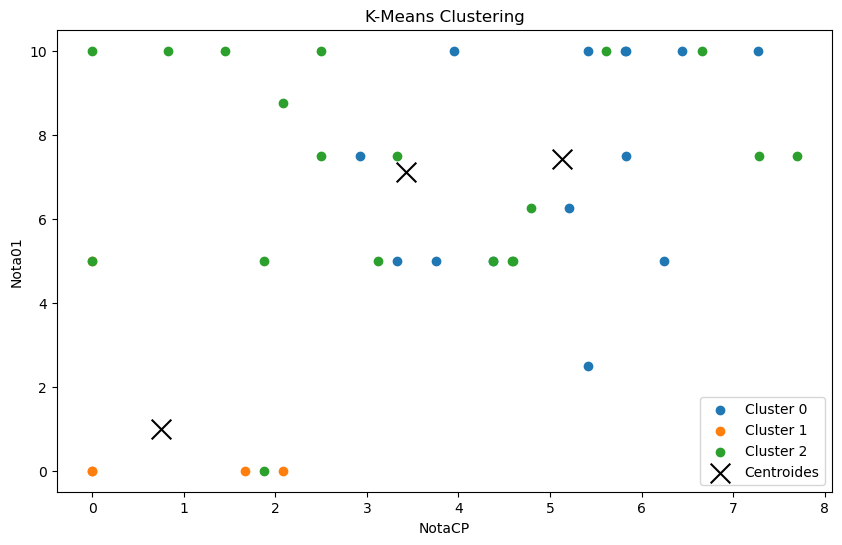

In [7]:
import matplotlib.pyplot as plt

# Selecione as  desejadas
caracteristicas = ['NotaCP', 'Nota01', 'Engajamento']

# Selecionar apenas as características do DataFrame
X = df_eng[caracteristicas]

# Escolha o número de clusters (n_clusters)
n_clusters = 3  # Altere o número de clusters conforme necessário

# Criar um modelo K-Means com o número desejado de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Ajustar o modelo aos dados
kmeans.fit(X)

# Adicionar as informações do cluster de volta ao DataFrame
df_eng['Cluster'] = kmeans.labels_

# Exibir informações sobre os clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=caracteristicas)
cluster_info = df_eng.groupby('Cluster').size()
print("Centros dos Clusters:")
print(cluster_centers)
print("\nContagem de amostras em cada cluster:")
print(cluster_info)

# Plotar os clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_data = df_eng[df_eng['Cluster'] == i]
    plt.scatter(cluster_data['NotaCP'], cluster_data['Nota01'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroides')
plt.xlabel('NotaCP')
plt.ylabel('Nota01')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Alunos em Cada Clustes

In [8]:
# Escolha um cluster específico (substitua 'cluster_numero' pelo número do cluster desejado)
cluster_numero = 0

# Selecione os alunos pertencentes a esse cluster
alunos_cluster = df_eng[df_eng['Cluster'] == cluster_numero]

# Exiba os alunos pertencentes a esse cluster
print(f"Alunos no Cluster {cluster_numero}:")
print(alunos_cluster)

Alunos no Cluster 0:
       Aluno  NotaCP  Nota01  Engajamento  Cluster
1   aluno 02   7.275   10.00          100        0
2   aluno 03   5.410   10.00          100        0
5   aluno 06   3.330    5.00          100        0
9   aluno 10   6.240    5.00          100        0
12  aluno 13   5.410    2.50          100        0
17  aluno 18   5.830   10.00          100        0
19  aluno 20   4.375    5.00          100        0
20  aluno 21   6.445   10.00          100        0
21  aluno 22   5.830    7.50          100        0
28  aluno 30   5.205    6.25          100        0
33  aluno 35   3.750    5.00          100        0
35  aluno 37   2.920    7.50          100        0
36  aluno 38   5.820   10.00          100        0
37  aluno 39   3.955   10.00          100        0


In [9]:
# Escolha um cluster específico (substitua 'cluster_numero' pelo número do cluster desejado)
cluster_numero = 1

# Selecione os alunos pertencentes a esse cluster
alunos_cluster = df_eng[df_eng['Cluster'] == cluster_numero]

# Exiba os alunos pertencentes a esse cluster
print(f"Alunos no Cluster {cluster_numero}:")
print(alunos_cluster)

Alunos no Cluster 1:
       Aluno  NotaCP  Nota01  Engajamento  Cluster
7   aluno 08    0.00     0.0            0        1
15  aluno 16    1.67     0.0           33        1
16  aluno 17    0.00     5.0           33        1
22  aluno 24    2.08     0.0           33        1
27  aluno 29    0.00     0.0            0        1


In [10]:
# Escolha um cluster específico (substitua 'cluster_numero' pelo número do cluster desejado)
cluster_numero = 2

# Selecione os alunos pertencentes a esse cluster
alunos_cluster = df_eng[df_eng['Cluster'] == cluster_numero]

# Exiba os alunos pertencentes a esse cluster
print(f"Alunos no Cluster {cluster_numero}:")
print(alunos_cluster)

Alunos no Cluster 2:
       Aluno  NotaCP  Nota01  Engajamento  Cluster
0   aluno 01   0.000   10.00           67        2
3   aluno 04   3.125    5.00           67        2
4   aluno 05   7.695    7.50           67        2
6   aluno 07   3.330    7.50           67        2
8   aluno 09   0.830   10.00           67        2
10  aluno 11   6.660   10.00           67        2
11  aluno 12   5.615   10.00           67        2
13  aluno 14   7.285    7.50           67        2
14  aluno 15   1.875    5.00           67        2
18  aluno 19   4.795    6.25           67        2
23  aluno 25   1.455   10.00           67        2
24  aluno 26   4.375    5.00           67        2
25  aluno 27   0.000    5.00           67        2
26  aluno 28   4.590    5.00           67        2
29  aluno 31   2.500   10.00           67        2
30  aluno 32   2.500    7.50           67        2
31  aluno 33   4.580    5.00           67        2
32  aluno 34   2.080    8.75           67        2
34  aluno 